In [2]:
import numpy as np 
import pylab as pl 
import pandas as pd 
import glob
import os
import seaborn as sns
%matplotlib inline 

In [3]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette(sns.color_palette("husl"))

In [15]:
path = "results/"                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,sep = '\t') for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df.sort_values('target_class')

,Unnamed: 0,background_estimate,dataset_id,decay_fit_pars,decay_reduced_chi_sq,decay_slope,decay_slope_err,fall_idx,peak_flux,peak_idx,rise_fit_pars,rise_idx,rise_reduced_chi_sq,rise_slope,rise_slope_err,target_class,trigger_idx
22,0,0.000000,PKS2004-447,"[-0.020289429185098132, 1.1553729320004427]",7.118672e-01,-0.020289,0.017807,19.0,0.605085,15.0,"[0.017770225345011183, -2.1184497553178785]",0.0,5.572391e-01,0.017770,0.003133,AGN,0.0
776,0,0.145614,NGC4278,"[-0.0009639483743880358, 4.6511492232620295]",1.134534e+00,-0.000964,0.000085,22.0,0.529825,17.0,"[0.0003745917071361197, -3.1456104149074497]",9.0,2.422032e+00,0.000375,0.000054,AGN,12.0
9,0,0.123077,NGC7213,"[-0.017406187493871253, 73.04573256913685]",3.614499e+00,-0.017406,0.004617,38.0,0.155385,34.0,"[0.05048834802587474, -224.67741865164385]",31.0,1.718846e+01,0.050488,0.010745,AGN,32.0
492,56,0.000000,Algol,"[-1.2350226698242162, 62694.54639707457]",inf,-1.235023,0.011705,1041.0,0.047000,1039.0,"[2.5121528515812686, -127535.8302014449]",1033.0,2.230708e+00,2.512153,0.260570,Algol,1034.0
491,55,0.000000,Algol,"[-2.1389142997619577, 108577.45983950903]",-1.875441e-20,-2.138914,inf,1027.0,0.041000,1026.0,"[1.927566796280783, -97854.95640553585]",1020.0,9.231303e-01,1.927567,0.779168,Algol,1026.0
490,54,0.000000,Algol,"[-1.3201447692625214, 67009.2018066827]",1.475911e+00,-1.320145,0.188422,1006.0,0.056000,1000.0,"[1.7351558107179252, -88081.51412971696]",998.0,inf,1.735156,0.018296,Algol,999.0
489,53,0.000000,Algol,"[-0.3871215413487877, 19646.857126283656]",1.545251e+01,-0.387122,0.058217,997.0,0.225000,971.0,"[-0.0760445726765393, 3857.088907908821]",947.0,4.352785e+01,-0.076045,0.099935,Algol,948.0
488,52,0.000000,Algol,"[-2.319964422370429, 117740.13592127338]",3.685580e+01,-2.319964,0.243965,947.0,0.593000,938.0,"[0.8915629106586017, -45249.532325789805]",919.0,8.548959e+01,0.891563,0.152932,Algol,927.0
487,51,0.000000,Algol,"[-1.9022750797729304, 96533.97659492052]",4.060984e+00,-1.902275,0.197457,919.0,0.346000,906.0,"[-0.052280377824652384, 2650.442496576041]",876.0,7.785059e+01,-0.052280,0.095439,Algol,878.0
486,50,0.000000,Algol,"[-1.1206678727079273, 56861.90466026574]",1.753990e+01,-1.120668,0.137573,872.0,0.261000,860.0,"[2.746044012962189, -139336.48656730563]",856.0,1.285482e+01,2.746044,0.206710,Algol,857.0


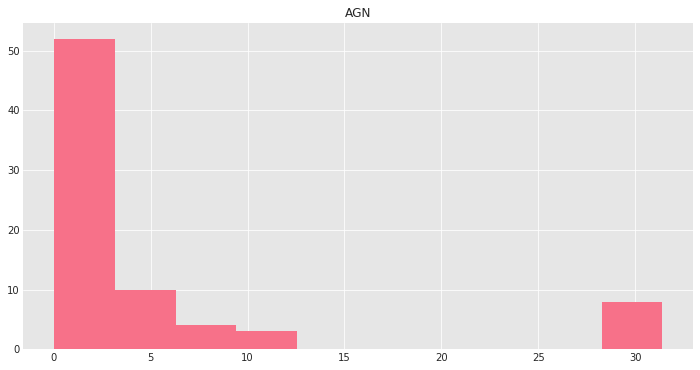

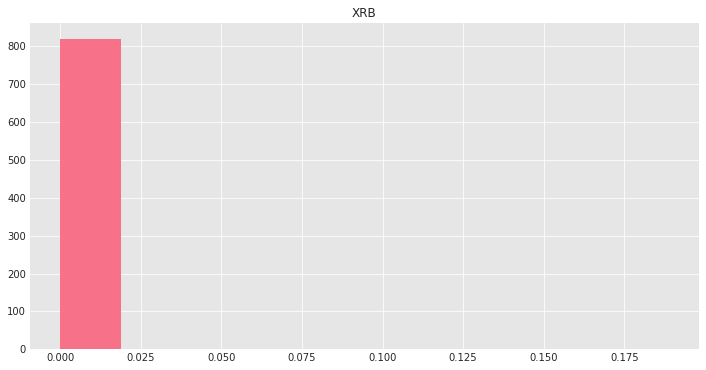

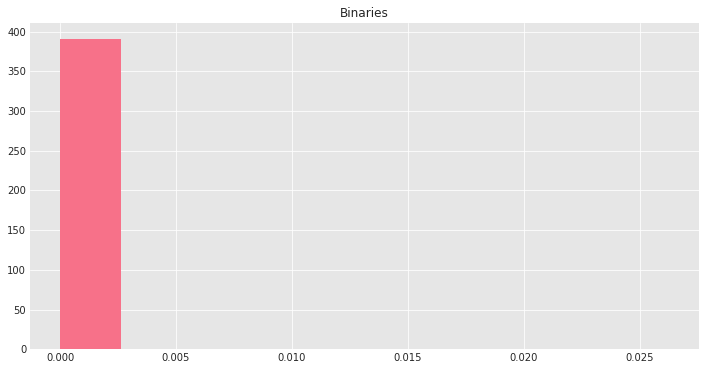

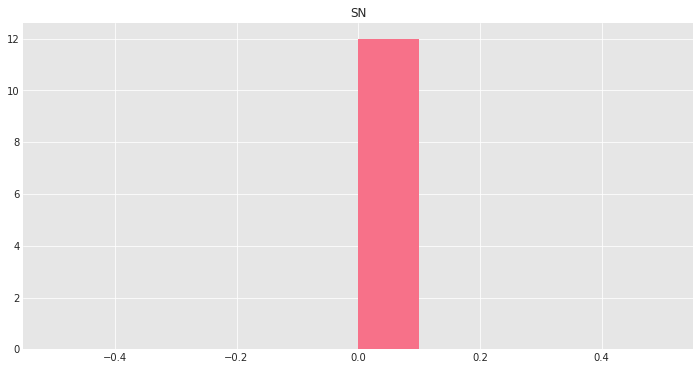

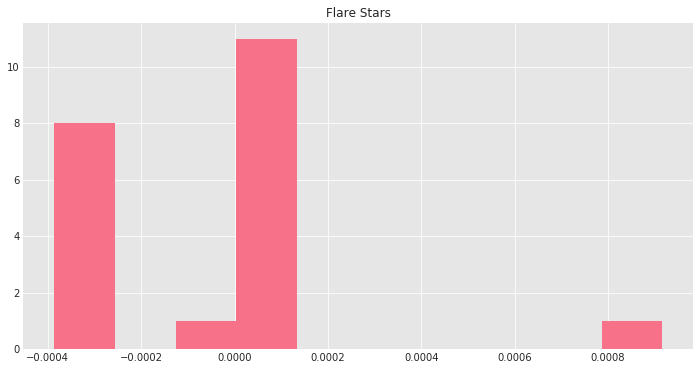

In [24]:
background_agn = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" )   , "background_estimate"]
background_xrb = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" ) , "background_estimate"]
background_bin = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')   , "background_estimate"]
background_sn = df.loc[(df["target_class"] == "SN" ) , "background_estimate"]
background_fs = df.loc[(df["target_class"] == "Flare_Stars" )   , "background_estimate"]

pl.figure(figsize=(12,6))
pl.hist(background_agn)
pl.title('AGN')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_xrb)
pl.title('XRB')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_bin)
pl.title('Binaries')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_sn)
pl.title('SN')
pl.show()

pl.figure(figsize=(12,6))
pl.hist(background_fs)
pl.title('Flare Stars')
pl.show()


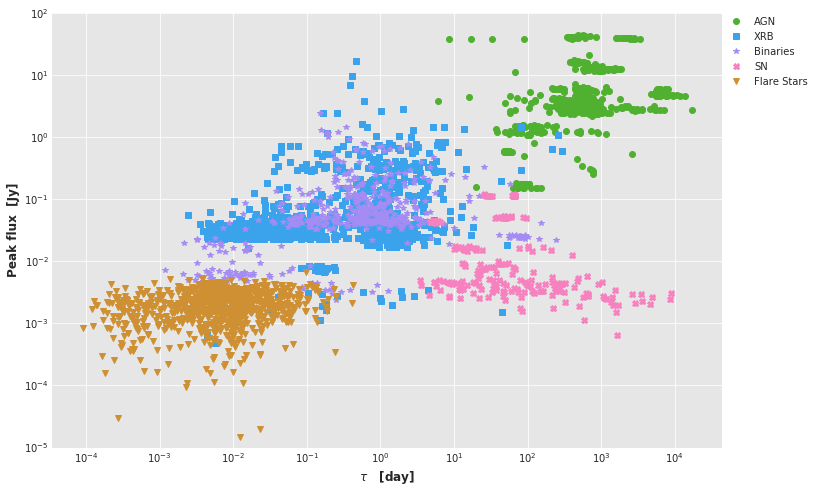

In [5]:
classes = df.target_class.unique()
#markers = ["o","v","^",">","1","3","8","s","p","P","*","h","X","<","2","4","H"]
markers = ["v","^",">","1","3","8","p","P","h","X","<","2","4","H"]
blue = (0.23299120924703914, 0.63958655206603499, 0.92607060939777441)
green = (0.31268900195043292, 0.6928754610296064, 0.19237048303303789)
purple = (0.64230443492197387, 0.54976800512564672, 0.9582651433656727)
pink = (0.96862745098039216, 0.50588235294117656, 0.74901960784313737)
orange = (0.8087954113106306, 0.56347000500566935, 0.19502642696727285)

rise_slope_agn = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" )   , "rise_slope"]
peak_flux_agn  = df.loc[(df["target_class"] == "BLAZAR" ) |(df["target_class"] == "AGN" ) , "peak_flux"]

rise_slope_xrb = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" ) , "rise_slope"]
peak_flux_xrb  = df.loc[(df["target_class"] == "BHXRB" ) |(df["target_class"] == "NSXRB" )|(df["target_class"] == "XRB" )  , "peak_flux"]

rise_slope_bin = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')   , "rise_slope"]
peak_flux_bin  = df.loc[(df["target_class"] == "Algol") |(df["target_class"] == "RSCVn") |(df["target_class"] == "magCV") |(df["target_class"] == 'BinaryPulsars')  , "peak_flux"]

rise_slope_sn = df.loc[(df["target_class"] == "SN" ) , "rise_slope"]
peak_flux_sn  = df.loc[(df["target_class"] == "SN" ) , "peak_flux"]

rise_slope_fs = df.loc[(df["target_class"] == "Flare_Stars" )   , "rise_slope"]
peak_flux_fs  = df.loc[(df["target_class"] == "Flare_Stars" )  , "peak_flux"]

        
pl.figure(figsize = [12,8])
pl.plot(1/rise_slope_agn,peak_flux_agn,marker = "o",linestyle = "",color= green ,label = "AGN")
pl.plot(1/rise_slope_xrb,peak_flux_xrb,marker = "s",linestyle = "",color= blue,label = "XRB")
pl.plot(1/rise_slope_bin,peak_flux_bin,marker = "*",linestyle = "",color= purple,label = "Binaries")
pl.plot(1/rise_slope_sn,peak_flux_sn,marker = "X",linestyle = "",color= pink,label = "SN")
pl.plot(1/rise_slope_fs,peak_flux_fs,marker = "v",linestyle = "",color= orange,label = "Flare Stars")

pl.xlabel(r'$\tau$   [day]',fontsize=12,fontweight='bold')
pl.ylabel("Peak flux  [Jy]",fontsize=12,fontweight='bold')
pl.xscale("log")
pl.yscale("log")
lgd = pl.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pl.ylim(ymin = 1e-5)
pl.savefig('fluxVstau.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
pl.show()



In [5]:
df['target_class'].value_counts()

Flare_Stars      931
BLAZAR           519
BHXRB            392
NSXRB            303
SN               252
XRB              235
Algol            229
RSCVn            176
Nova             147
magCV             75
GRB               74
AGN               50
TDE               42
ULX               21
DN                21
BinaryPulsars     21
Magnetar          21
Name: target_class, dtype: int64

In [41]:
209+176+6

391

* Algol: Eclisping binaries - one main sequence, one not. 
* RSCVn: RS Canum Venaticorum variable - type of binary - close binary stars with active chromospheres 
* magCV: Cataclysmic variable binary star system
* Flare star: variable star due to something analogous to solar flares. 

Types: 
- XRB           - 821
- Non XRB       - 391
- AGN           - 77
- Flare Stars   - 21
- SN            - 12

In [39]:
b = 1.0
c = [1.0]
a = np.resize(0.85,12)
for i in a:
    c.append(np.sum(c)/i)

In [40]:
np.sum(c)

11298.834107569444

[(0.96779755929199129, 0.44127456009157356, 0.53581031550587011),
 (0.8087954113106306, 0.56347000500566935, 0.19502642696727285),
 (0.59208915296397013, 0.64184670163782442, 0.19350691349910429),
 (0.19783576093349015, 0.69555169660630367, 0.39953010374444992),
 (0.21044753832183283, 0.67731050804567483, 0.64339411684686809),
 (0.22335772267769388, 0.6565792317435265, 0.81713555032656326),
 (0.64230443492197387, 0.54976800512564672, 0.9582651433656727),
 (0.96038885399407026, 0.38143178787721171, 0.86831176508354913)]

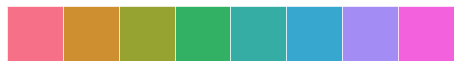

In [32]:
sns.palplot(sns.color_palette("husl",8))
sns.color_palette("husl",8)